## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [7]:
# 把兩個訓練資料集和測試資料集讀進來
train = pd.read_csv(".\Titanic_train.csv")
test = pd.read_csv(".\Titanic_test.csv")
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [9]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
#test沒有survived欄位

## Q2: 測試資料集是否有遺失值?

In [13]:
#可以嘗試用範例的程式
test.isnull().sum()
#Age、Cabin都有缺失值

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [14]:
#合併資料
#合併資料
data = train.append(test)

#輸出INFO
print(('data'+' INFO').center(40,'-'))
print(data.info(),'\n'*3)

---------------data INFO----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None 





In [16]:
# 遺失超過六成的欄位
print(f'遺失超過六成的欄位:\t{", ".join([col for col in data.columns if data[col].isnull().sum() / len(data[col]) > 0.6])}')

# 輸出遺失個數/總個數
for col in data.columns:
    if data[col].isnull().sum() / len(data[col]) > 0.6:
        print(col+f'遺失個數/總個數:\t{data[col].isnull().sum()}/{len(data[col])}')
        
print(data['Cabin'].value_counts())

遺失超過六成的欄位:	Cabin
Cabin遺失個數/總個數:	1014/1309
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F2                 4
B96 B98            4
                  ..
C95                1
B42                1
C130               1
C50                1
D34                1
Name: Cabin, Length: 186, dtype: int64


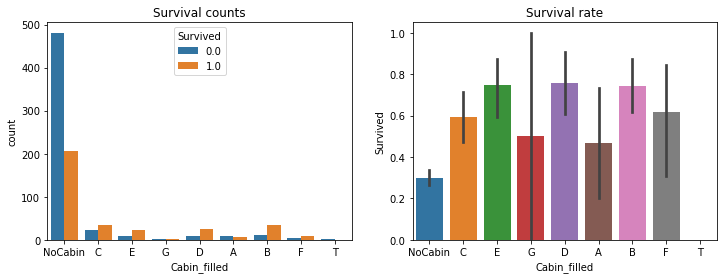

In [21]:
# 方法1:遺失的屬於另一類，直接填充'NoCabin'。 
data['Cabin_filled'] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

# 畫出死亡總數、死亡率的圖
col_name = 'Cabin_filled'
plt.figure(figsize=(12,4))
for i,fig in enumerate({'Survival counts':
                        lambda title: sns.countplot(col_name, None,
                                                    'Survived', data=data).set_title(title),
                        'Survival rate':
                        lambda title: sns.barplot(col_name,'Survived', data=data).set_title(title)
                       }.items()):
    sub = plt.subplot(1, 2, i+1)
    sub = fig[1](fig[0])
plt.show()



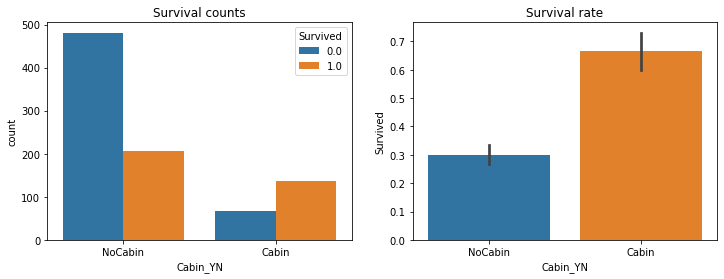

In [19]:
# 將有值與無值做比較，#畫出死亡總數、死亡率的圖
data['Cabin_YN'] = data['Cabin'].apply(lambda x : 'Cabin' if not pd.isnull(x) else 'NoCabin')
col_name = 'Cabin_YN'
plt.figure(figsize=(12,4))
for i,fig in enumerate({'Survival counts':
                        lambda title: sns.countplot(col_name, None,
                                                    'Survived', data=data).set_title(title),
                        'Survival rate':
                        lambda title: sns.barplot(col_name,'Survived', data=data).set_title(title)
                       }.items()):
    sub = plt.subplot(1, 2, i+1)
    sub = fig[1](fig[0])
plt.show()

In [18]:
#結論: Cabin缺失的欄位死亡率較高,並不適合直接填充值，又因其遺失超過六成，該考慮捨棄該欄位。